In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from visualization import *
from core.file import NuMLFile
from IPython.display import clear_output
import plotly.graph_objects as go

In [3]:
fname = "/data/uboone/uboone_numu_slice_seq.h5"

In [4]:
"""Process all events in a file into graphs"""
f = NuMLFile(fname)
f.add_group("hit_table")
f.add_group("particle_table", ["g4_id", "parent_id", "type", "momentum", "start_process", "end_process"])
f.add_group("edep_table")
f.add_group("spacepoint_table")
f.read_data([0], [1000], use_seq=True, profile=False)
evt_list = f.build_evt(0, 1000)

In [8]:
# set up event for testing by choosing an event from evt_list to look at
current_event = evt_list[2]
planes = single_plane_graph_vis(current_event)
particle = current_event['particle_table']
hier = extract_hierarchy(planes, particle)

func:'panoptic_label' took: 0.4657 sec


In [9]:
# function for visualizing hierarchy

import networkx as nx
import matplotlib.pyplot as plt
def vis_hierarchy(hier_df):
    ''' Visualize the tree hierarchy of a particle event '''
    # make a list of all the edges
    edges = []
    for particle in hier_df.index.values:
        if hier_df.iloc[particle]['neighbors'] == []: 
            break
        else:
            for neighbor in hier_df.iloc[particle]['neighbors']:
                edges.append((particle, neighbor))
    
    # turn this list into a networkx graph and visualize
    G = nx.DiGraph()
    G.add_edges_from(edges)
    pos = nx.kamada_kawai_layout(G)
    # nx.draw_networkx(G, pos)

    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in pos:
        node_x.append(pos[node][0])
        node_y.append(pos[node][1])

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            # colorscale options
            #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
            #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
            #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
            colorscale='YlGnBu',
            reversescale=True,
            color=[],
            size=10,
            colorbar=dict(
                thickness=15,
                title='Number of Children',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    node_adjacencies = []
    node_text = []
    for node, adjacencies in enumerate(G.adjacency()):
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append('g4_id: ' + str(node) + '\n # of children: '+str(len(adjacencies[1])))

    node_trace.marker.color = node_adjacencies
    node_trace.text = node_text

    fig = go.Figure(data=[edge_trace, node_trace],
                 layout=go.Layout(
                    title='<br>Particle Hierarchy',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=20,l=5,r=5,t=0),
                    # annotations=[ dict(
                    #     text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
                    #     showarrow=False,
                    #     xref="paper", yref="paper",
                    #     x=0.005, y=-0.002 ) ],
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                    )
    fig.show()


/tmp/ipykernel_14135/1961413042.py:10: DeprecationWarning:

elementwise comparison failed; this will raise an error in the future.



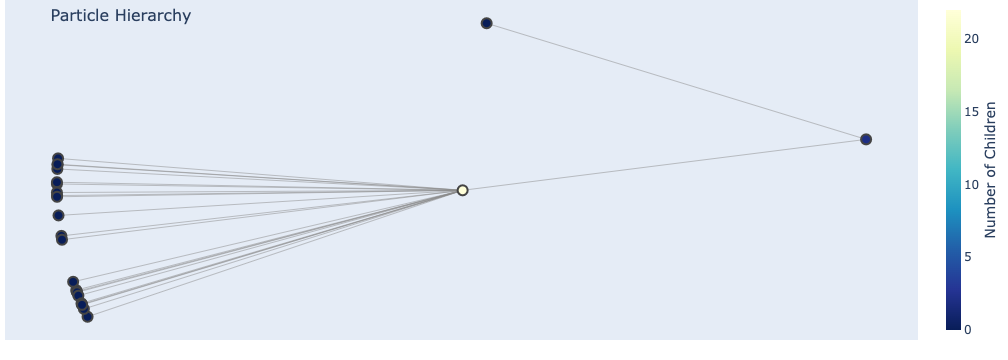

In [10]:
# test function
test=hier[0] # choose one of the three planes to look at hierarchy
vis_hierarchy(test)